# **Developed a mini data analytics pipeline that generates synthetic customer data, performs exploratory data analysis (EDA), and visualizes key business metrics such as churn rate, usage trends, and demographic distributions. The project demonstrates core data analyst skills in data generation, manipulation, visualization, and statistical analysis.**

First Import Packages in cmd : pip install pandas numpy faker matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns

fake = Faker()


# 💡 Objectives
Simulate realistic customer behavior and churn patterns

Perform EDA to extract actionable business insights

Visualize metrics relevant to customer retention and engagement

Export structured data for future modeling or dashboarding

🔧 Tools & Technologies
Python: Core logic and data handling

Pandas & NumPy: Data manipulation and summarization

Faker: Random yet realistic synthetic data generation

Matplotlib & Seaborn: Data visualization and charts

In [ ]:
def generate_customer_data(num_customers=1000, seed=42):
    np.random.seed(seed)

    data = []
    for _ in range(num_customers):
        age = np.random.randint(18, 70)
        gender = np.random.choice(['Male', 'Female'])
        region = np.random.choice(['North', 'South', 'East', 'West'])
        service_type = np.random.choice(['Free', 'Basic', 'Pro'], p=[0.3, 0.5, 0.2])
        usage_minutes = np.random.normal(loc=300, scale=50)
        churned = np.random.choice([0, 1], p=[0.8, 0.2])  # 20% churn rate
        join_date = fake.date_between(start_date='-2y', end_date='-1m')
        last_active_date = fake.date_between(start_date=join_date, end_date='today')

        data.append([
            fake.uuid4(), join_date, age, gender, region, service_type,
            round(usage_minutes, 1), last_active_date, churned
        ])

    columns = [
        'customer_id', 'join_date', 'age', 'gender', 'region',
        'service_type', 'usage_minutes', 'last_active_date', 'churned'
    ]
    
    return pd.DataFrame(data, columns=columns)

# 🧠 Key Features
Generates random data for 1,000+ customers

Includes attributes like age, gender, region, usage, service type, churn status, etc.

Calculates and prints:

Overall churn rate

Usage trends by service type

Age distribution

Produces 3 key plots:

Histogram of age distribution

Box plot of usage by service type

Churn rate segmented by service type

Saves dataset as a CSV file for future modeling or BI dashboards

✅ Data saved to 'customer_data.csv'
📊 Churn Rate: 22.10%

📈 Average usage by service type:
 service_type
Basic    302.705788
Free     305.598653
Pro      304.587129
Name: usage_minutes, dtype: float64


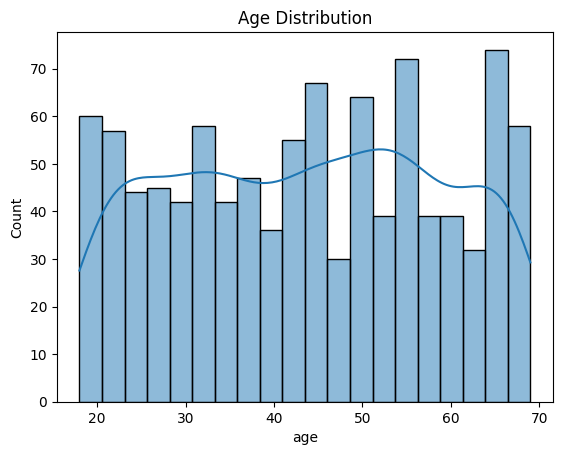

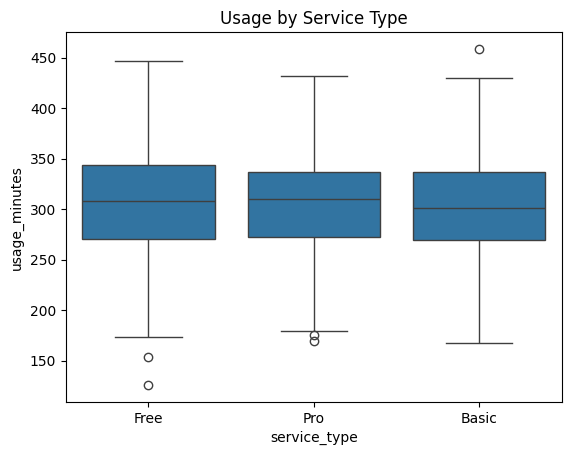

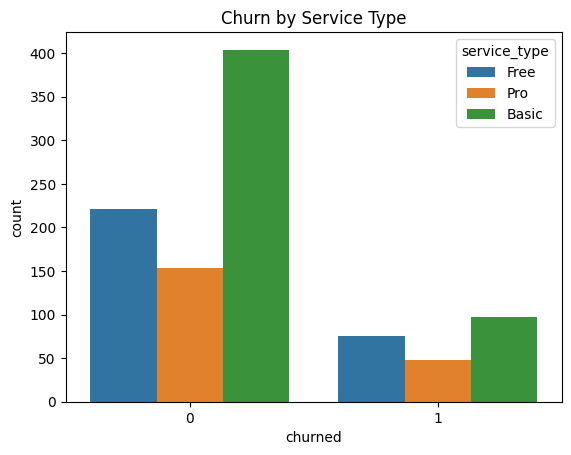

In [ ]:
def analyze_data(df):
    print("📊 Churn Rate: {:.2f}%".format(df['churned'].mean() * 100))
    print("\n📈 Average usage by service type:\n", df.groupby('service_type')['usage_minutes'].mean())
    
    # Plotting
    sns.histplot(df['age'], bins=20, kde=True)
    plt.title('Age Distribution')
    plt.show()

    sns.boxplot(x='service_type', y='usage_minutes', data=df)
    plt.title('Usage by Service Type')
    plt.show()

    sns.countplot(x='churned', hue='service_type', data=df)
    plt.title('Churn by Service Type')
    plt.show()

def main():
    df = generate_customer_data(num_customers=1000)
    df.to_csv('customer_data.csv', index=False)
    print("✅ Data saved to 'customer_data.csv'")
    
    analyze_data(df)

if __name__ == "__main__":
    main()

✅ Skills Demonstrated
Data simulation and synthetic data design

Exploratory data analysis (EDA)

Statistical trend identification

Visualization best practices

CSV data export for downstream tasks